In [231]:
## Importação de Bibliotecas
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [232]:
heartDf = pd.read_csv('./heart.csv')
heartDf.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [233]:
renamedHeartDf = heartDf.rename(columns={
  "cp": "chestPain", 
  "trtbps": "restingBloodPressure",
  "chol": "cholesterol",
  "fbs": "fastingBloodSugar",
  "restecg": "restEcg",
  "thalachh": "maxHeartRateAchieved",
  "exng": "exerciceInducedAngina",
  "oldpeak": "stDepression",
  "slp": "stSegmentSlope",
  "caa": "majorVesselsNum",
  "thall": "thalassemia",
  "output": "heartDisease"
})
targetResults = renamedHeartDf.heartDisease

renamedHeartDf.drop("heartDisease", axis=1, inplace=True)

In [234]:
X_train, X_test, y_train, y_test = train_test_split(
  renamedHeartDf,
  targetResults,
  random_state=1, 
  test_size=0.2
)
sc_X = StandardScaler()
X_trainscaled = sc_X.fit_transform(X_train)
X_testscaled = sc_X.transform(X_test)

,hidden_layer_sizess,training_accuracy,test_accuracy
0,(100),0.938017,0.721311
1,"(50, 100, 50)",1.000000,0.704918
2,"(16, 4)",0.888430,0.786885
3,"(8, 2)",0.867769,0.803279


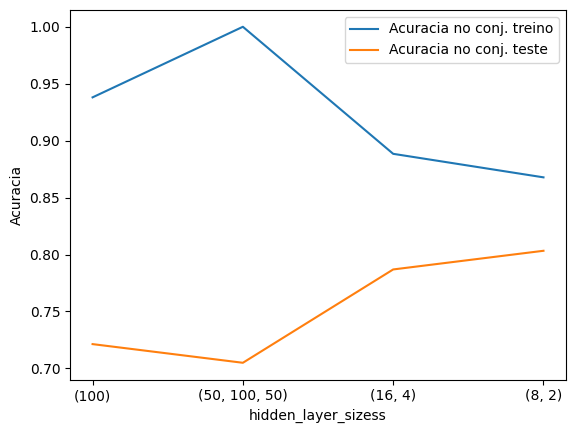

In [235]:
training_accuracy = []
test_accuracy = []

hidden_layer_sizess = [(100), (50, 100, 50), (16, 4), (8, 2)]
str_hidden_layer_sizess = ['(100)', '(50, 100, 50)', '(16, 4)', '(8, 2)']

for hidden_layer_sizes in hidden_layer_sizess:
  mlp = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes,
  ).fit(X_trainscaled, y_train)
  training_accuracy.append(mlp.score(X_trainscaled, y_train))
  test_accuracy.append(mlp.score(X_testscaled, y_test))

plt.plot(str_hidden_layer_sizess, training_accuracy, label='Acuracia no conj. treino')
plt.plot(str_hidden_layer_sizess, test_accuracy, label='Acuracia no conj. teste')
plt.ylabel('Acuracia')
plt.xlabel('hidden_layer_sizess')
plt.legend()

pd.DataFrame({"hidden_layer_sizess": str_hidden_layer_sizess, "training_accuracy": training_accuracy, "test_accuracy":test_accuracy })

,activations,training_accuracy,test_accuracy
0,identity,0.851240,0.754098
1,logistic,0.793388,0.770492
2,tanh,0.863636,0.819672
3,relu,0.855372,0.754098


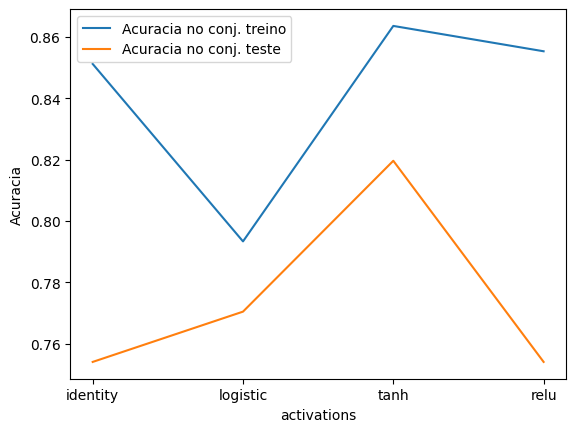

In [236]:
training_accuracy = []
test_accuracy = []

activations = ['identity', 'logistic', 'tanh', 'relu']

for activation in activations:
  mlp = MLPClassifier(
    hidden_layer_sizes=(8, 2),
    activation=activation,    
  ).fit(X_trainscaled, y_train)
  training_accuracy.append(mlp.score(X_trainscaled, y_train))
  test_accuracy.append(mlp.score(X_testscaled, y_test))

plt.plot(activations, training_accuracy, label='Acuracia no conj. treino')
plt.plot(activations, test_accuracy, label='Acuracia no conj. teste')
plt.ylabel('Acuracia')
plt.xlabel('activations')
plt.legend()

pd.DataFrame({"activations": activations, "training_accuracy": training_accuracy, "test_accuracy":test_accuracy })

,solvers,training_accuracy,test_accuracy
0,lbfgs,0.975207,0.754098
1,sgd,0.640496,0.540984
2,adam,0.876033,0.786885


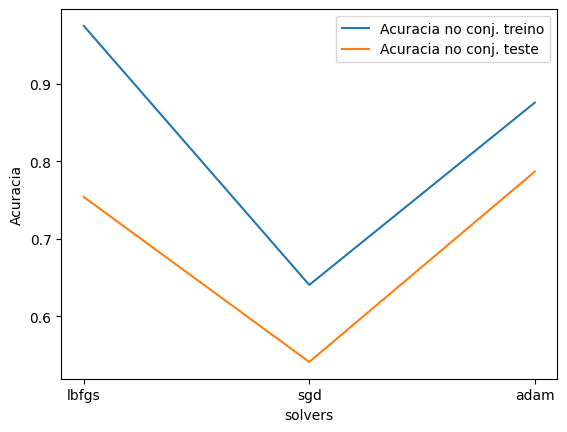

In [249]:
training_accuracy = []
test_accuracy = []

solvers = ['lbfgs', 'sgd', 'adam']

for solver in solvers:
  mlp = MLPClassifier(
    hidden_layer_sizes=(8, 2),
    activation='tanh',    
    solver=solver,
  ).fit(X_trainscaled, y_train)
  training_accuracy.append(mlp.score(X_trainscaled, y_train))
  test_accuracy.append(mlp.score(X_testscaled, y_test))

plt.plot(solvers, training_accuracy, label='Acuracia no conj. treino')
plt.plot(solvers, test_accuracy, label='Acuracia no conj. teste')
plt.ylabel('Acuracia')
plt.xlabel('solvers')
plt.legend()

pd.DataFrame({"solvers": solvers, "training_accuracy": training_accuracy, "test_accuracy":test_accuracy })

In [255]:
clf = MLPClassifier(  
  hidden_layer_sizes=(8, 2),
  activation='tanh',
  solver= 'adam',
).fit(X_trainscaled, y_train)

score = clf.score(X_testscaled, y_test)
print("Precisão: %.2f" % score)

Precisão: 0.79


In [265]:
test_sample = X_testscaled[0]
test_sample

array([ 0.82357149, -1.50674161, -0.95800789,  1.64732574, -1.60248069,
       -0.41803981, -1.02735505, -0.19244949, -0.68313005,  4.72344331,
       -2.30421185,  2.26339365,  1.16707438])

In [266]:
result_test_sample = y_test.head(1)
result_test_sample

204    0
Name: heartDisease, dtype: int64

In [270]:
clf.predict([test_sample])

array([0])

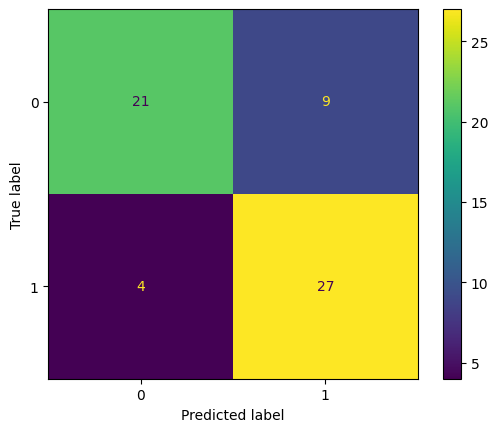

In [271]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

preds = clf.predict(X_testscaled)

cm = confusion_matrix(y_test, preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [272]:
import warnings
warnings.filterwarnings('ignore')

In [273]:
from sklearn.model_selection import GridSearchCV

grid_params = [
  {
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'hidden_layer_sizes': [
      (100), (50, 100, 50), (16, 4), (8, 2)
    ],
  }
]

In [304]:
clf = GridSearchCV(MLPClassifier(), grid_params, scoring='accuracy', n_jobs=10)
clf.fit(sc_X.transform(renamedHeartDf), targetResults)

print("Best parameters set found on development set:")
print(clf.best_params_)
print("Score: %.2f" % clf.best_score_)

/home/daniellucas/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/daniellucas/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/daniellucas/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/daniellucas/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/daniellucas/.local/lib

Best parameters set found on development set:
{'activation': 'relu', 'hidden_layer_sizes': 100, 'solver': 'sgd'}
Score: 0.84


In [325]:
clf = MLPClassifier(
  hidden_layer_sizes=(100),
  activation="relu",  
  solver='sgd'
).fit(X_trainscaled, y_train)

print(clf.score(X_testscaled, y_test))

0.8032786885245902


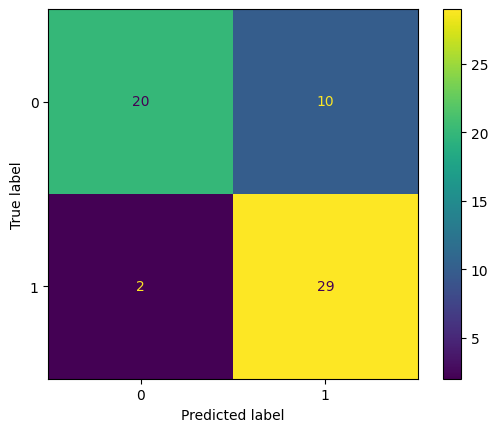

In [328]:
preds = clf.predict(X_testscaled)

cm = confusion_matrix(y_test, preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()